In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [21]:
df=pd.read_csv('D:/shree/Advertising.csv')

In [22]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [23]:
df.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [24]:
df.shape

(200, 4)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [26]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [27]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


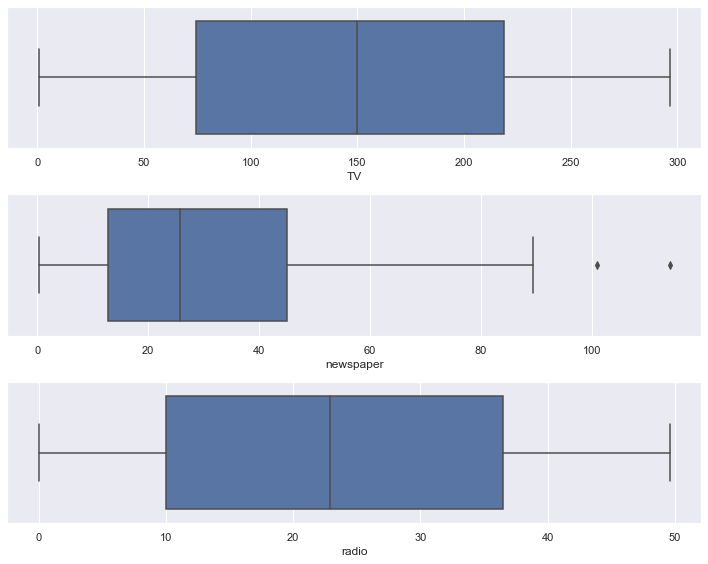

In [36]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (10,8))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['radio'], ax = axs[2])
plt.tight_layout()

# Exploratory Data Analysis

In [28]:
sns.set()

<Figure size 432x432 with 0 Axes>

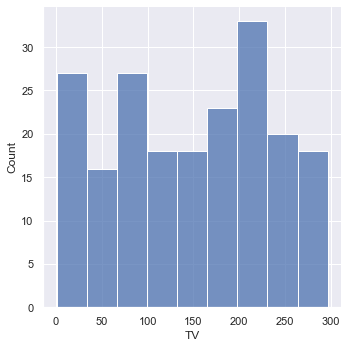

In [29]:
# TV distribution
plt.figure(figsize=(6,6))
sns.displot(df['TV'])
plt.show()

<Figure size 432x432 with 0 Axes>

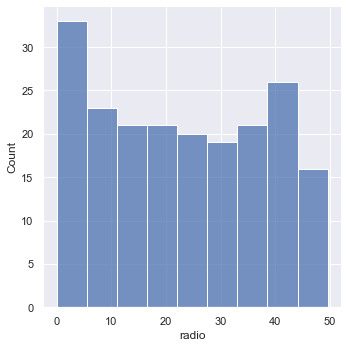

In [30]:
#radio distribution
plt.figure(figsize=(6,6))
sns.displot(df['radio'])
plt.show()

<Figure size 432x432 with 0 Axes>

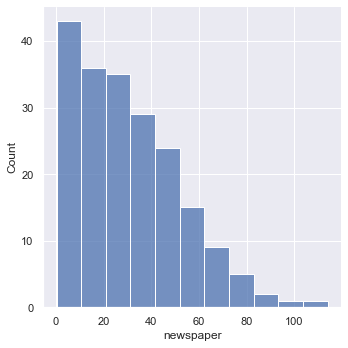

In [31]:
# newspaper distribution
plt.figure(figsize=(6,6))
sns.displot(df['newspaper'])
plt.show()

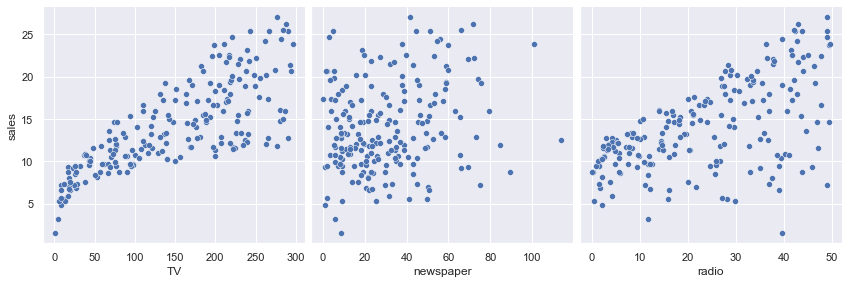

In [39]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(df, x_vars=['TV', 'newspaper', 'radio'], y_vars='sales', height=4, aspect=1, kind='scatter')
plt.show()

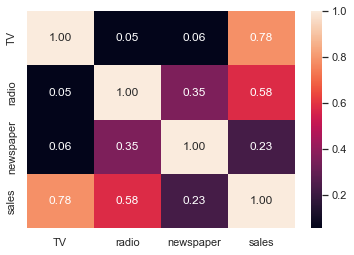

In [41]:
# Let's see the correlation between different variables.
sns.heatmap(df.corr(), annot = True, fmt = ".2f")
plt.show()

As we can see from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales. So let's go ahead and perform simple linear regression using TV as our feature variable.

# Model Building

Performing Simple Linear Regression

Equation of linear regression

y=c+m1x1+m2x2+...+mnxn 

-->y  is the response

-->c  is the intercept

-->m1  is the coefficient for the first feature

-->mn  is the coefficient for the nth feature

In our case:

y=c+m1×TV 

The  m  values are called the model coefficients or model parameters.

In [46]:
x = df['TV']
y = df['sales']

In [47]:
# spliting data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [48]:
print(x.shape,x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(200,) (140,) (60,)
(140,) (60,)


# Building a Linear Model

In [49]:
import statsmodels.api as sm

By default, the statsmodels library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the add_constant attribute of statsmodels. And once you've added the constant to your X_train dataset, you can go ahead and fit a regression line using the OLS (Ordinary Least Squares) attribute of statsmodels as shown below

In [51]:
# Add a constant to get an intercept
x_train_sm = sm.add_constant(x_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, x_train_sm).fit()

In [52]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    6.989666
TV       0.046497
dtype: float64

In [53]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     219.0
Date:                Tue, 29 Mar 2022   Prob (F-statistic):           2.84e-30
Time:                        21:41:53   Log-Likelihood:                -370.62
No. Observations:                 140   AIC:                             745.2
Df Residuals:                     138   BIC:                             751.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9897      0.548     12.762      0.0

# Looking at some key statistics from the summary

The values we are concerned with are -

The coefficients and significance (p-values)

R-squared

F statistic and its significance

# Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

Sales=6.989+0.046×TV

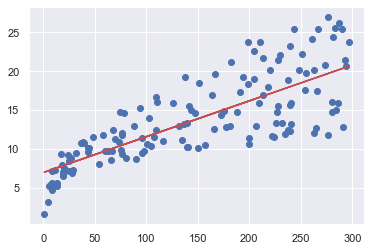

In [55]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.989 + 0.046*X_train, 'r')
plt.show()

# Model Evaluation

In [56]:
y_train_pred = lr.predict(x_train_sm)
res = (y_train - y_train_pred)

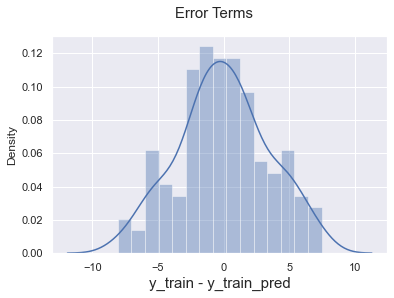

In [57]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

The residuals are following the normally distributed with a mean 0. All good!

# Looking for patterns in the residuals

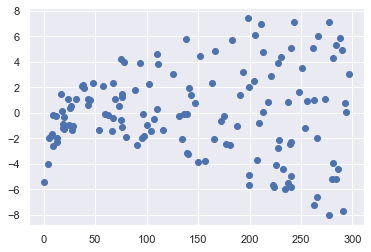

In [58]:
plt.scatter(x_train,res)
plt.show()

The variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

# Predictions on the Test Set

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the x_test data like you did for x_train and then you can simply go on and predict the y values corresponding to x_test using the predict attribute of the fitted regression line.

In [59]:
# Add a constant to X_test
x_test_sm = sm.add_constant(x_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(x_test_sm)

In [60]:
y_pred.head()

126     7.352345
104    18.065337
99     13.276109
92     17.112141
111    18.228077
dtype: float64

In [61]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Looking at the RMSE

In [62]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

2.8241456288327016

Checking the R-squared on the test set

In [63]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.59429872677833

Visualizing the fit on the test set

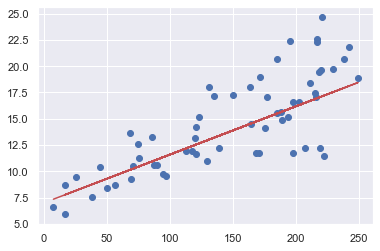

In [64]:
plt.scatter(x_test, y_test)
plt.plot(x_test, 6.989 + 0.046 * x_test, 'r')
plt.show()